In [12]:
from Tools import *
from photoObject import *
import emcee
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

In [13]:
def angstromTokms(centralA,As):
    c=299792
    v=c*(As-centralA)/centralA
    return v

def LineToRedshift(Obs,Rest):
    return (Obs/Rest)-1

def RedshiftToLine(Obs,z):
    return (Obs/(1+z))

def kmsToangstrom(v,centralA):
    c=299792
    As = centralA*(v+c)/c
    return np.abs(centralA-As)

In [14]:
#LAE
cat=ascii.read("../Catalogs/Binospec-Candels.cat")
Err=cat["LyaErr"]


In [27]:
spec[0][-1]

10251.2200268507

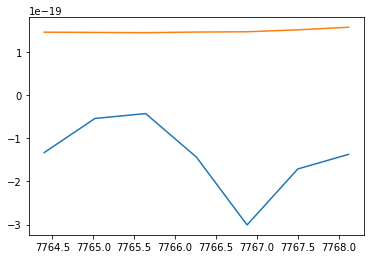

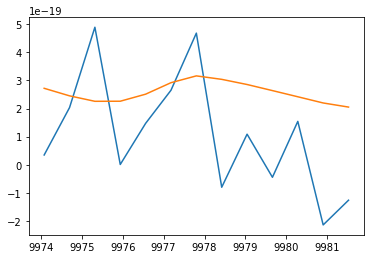

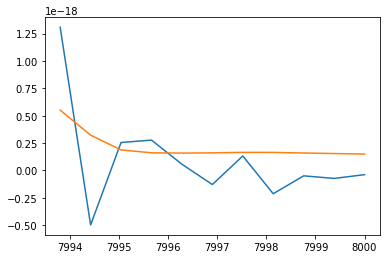

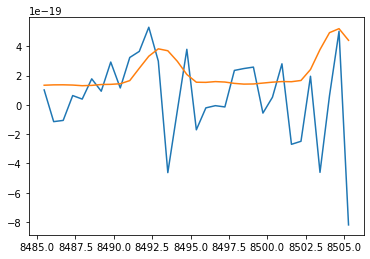

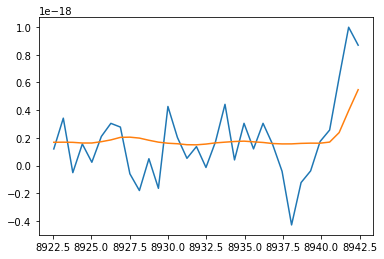

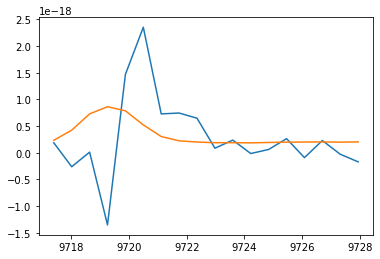

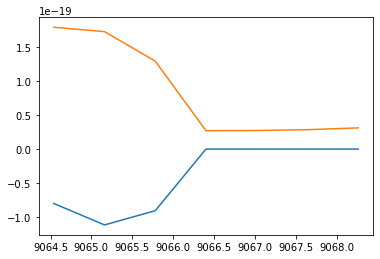

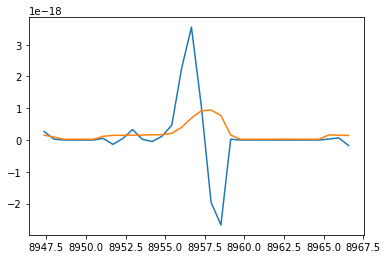

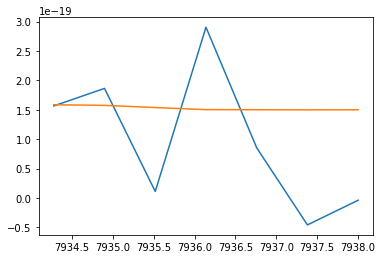

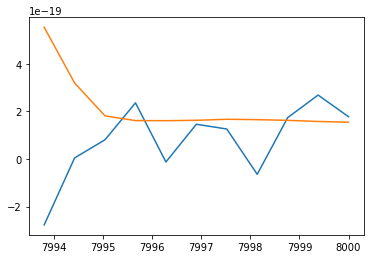

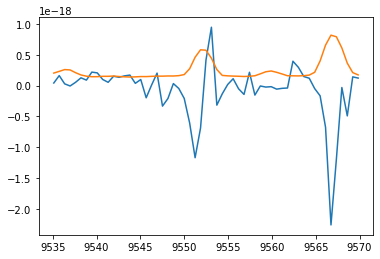

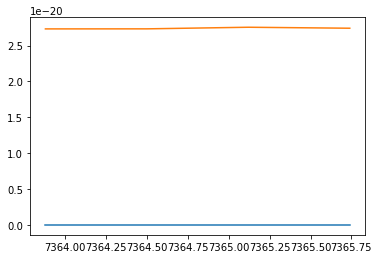

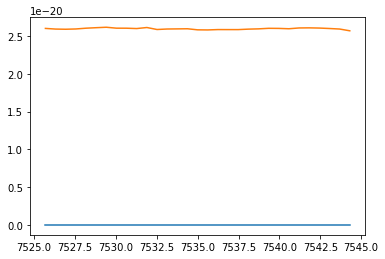

TOO HIGH


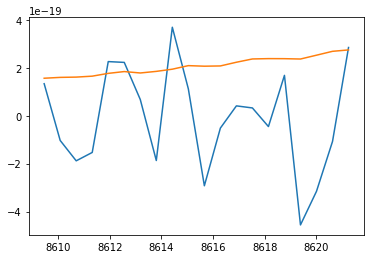

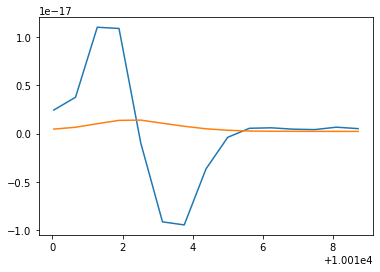

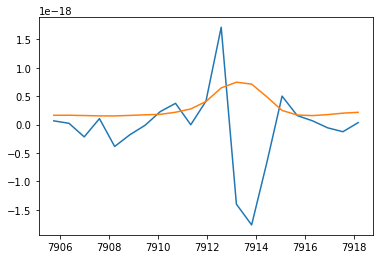

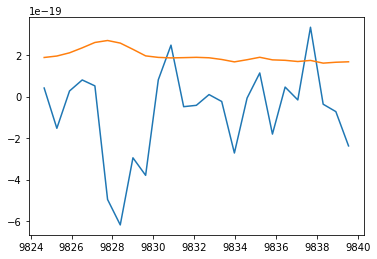

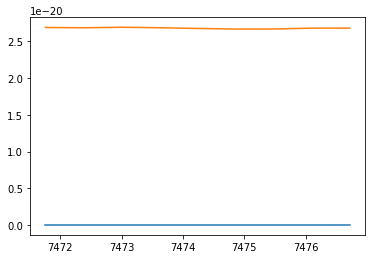

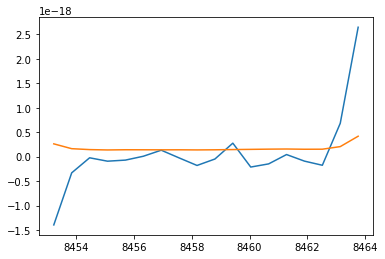

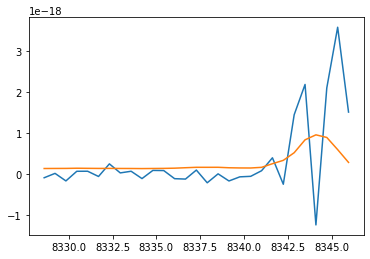

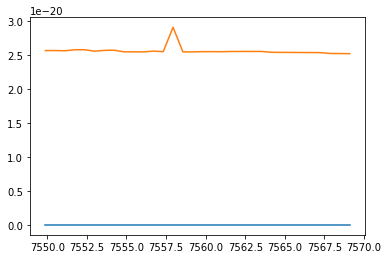

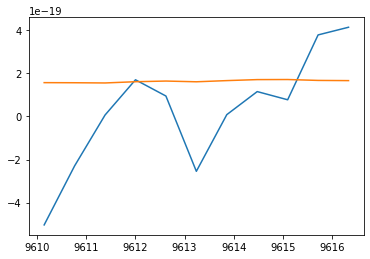

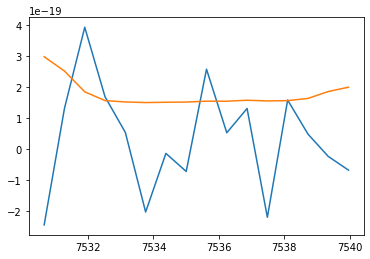

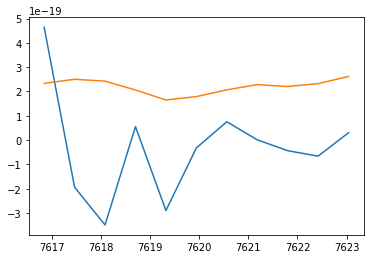

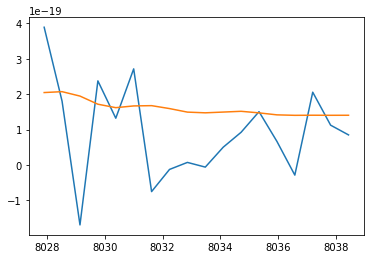

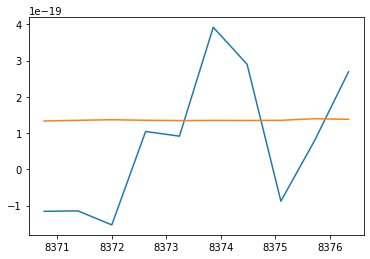

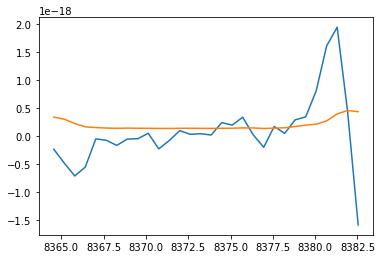

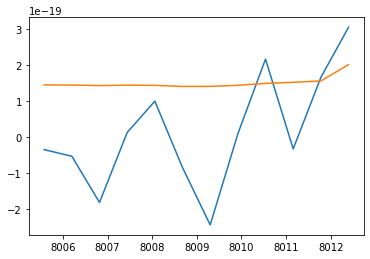

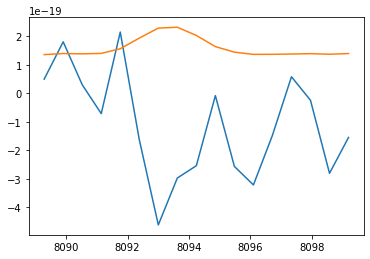

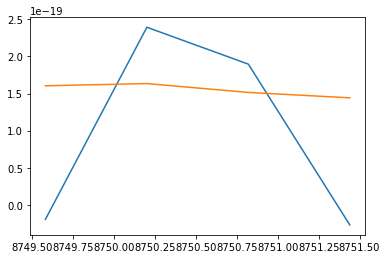

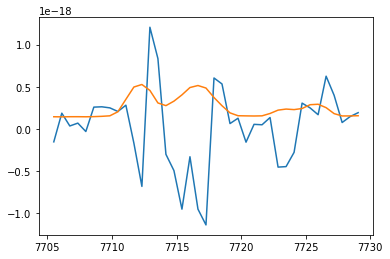

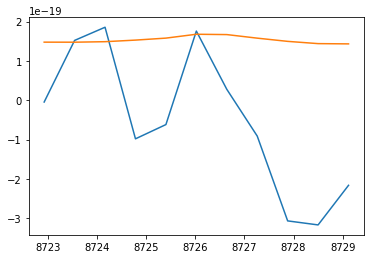

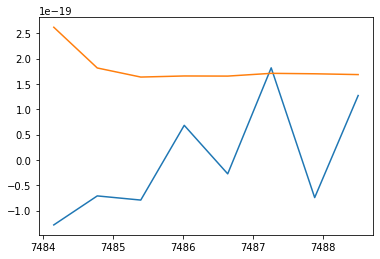

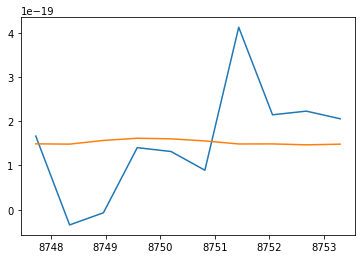

TOO HIGH


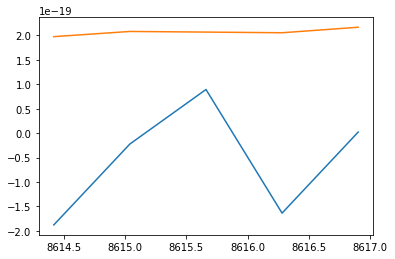

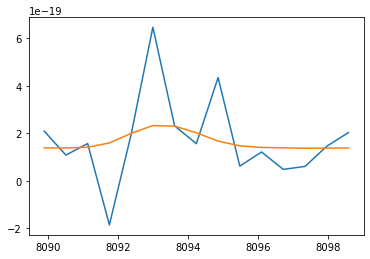

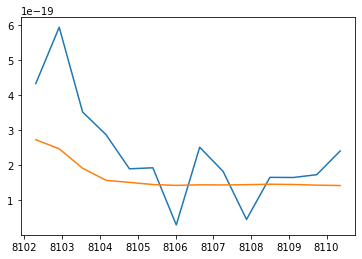

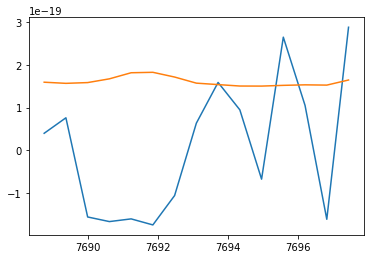

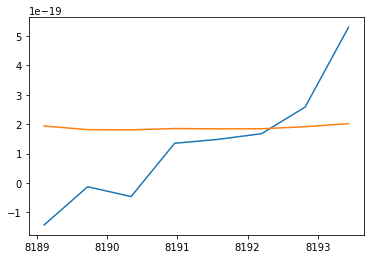

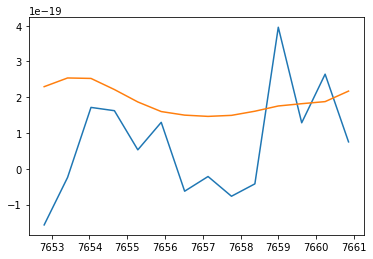

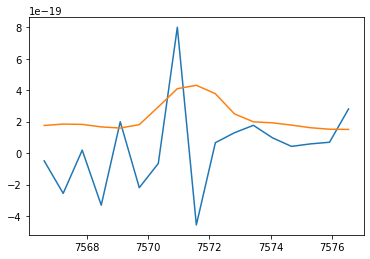

KeyboardInterrupt: 

In [30]:
#NONLAE
Spectra=np.load("../Catalogs/ALLSpectra.npy",allow_pickle=True).tolist()
FWHM=np.load("../Catalogs/FWHM.npy")

stuff={}
for gal in cat:
    stuff[gal["id_charlotte"]]=[gal["Type"],gal["photoz"]]
IDs=list(Spectra.keys())


Err2=[]
fw=[]
for id in IDs:
    type,zphot=stuff[id]
    if type=="NonDetect":
        spec=Spectra[id]
        wave,flux,err=spec
        fwhm=10**np.random.normal(loc=np.nanmean(np.log10(FWHM)),scale=np.nanstd(np.log10(FWHM)))
        fw.append(fwhm)
        lya,eks,fwhm=1215.335*(1+zphot) ,    20  ,fwhm/2

        
        mask=(wave>lya-eks) & (wave<lya+eks)
        wave,flux,err=wave[mask],flux[mask],err[mask]

        if (lya-eks)<spec[0][0]:
            wave,flux,err=spec
            lya,eks,fwhm=1215.335*(1+6.209) ,    20  ,fwhm/2
            print("TOO LOW")
            mask=(wave>lya-eks) & (wave<lya+eks)
            wave,flux,err=wave[mask],flux[mask],err[mask]

        if (lya+eks)>spec[0][-1]:
            wave,flux,err=spec
            lya,eks,fwhm=1215.335*(1+6.089) ,    20  ,fwhm/2
            print("TOO HIGH")
            mask=(wave>lya-eks) & (wave<lya+eks)
            wave,flux,err=wave[mask],flux[mask],err[mask]

        extractSize=kmsToangstrom(fwhm,lya)
        mask=(wave>lya-extractSize) & (wave<lya+extractSize)
        wave,flux,err=wave[mask],flux[mask],err[mask]

        Err2.append([id,np.log10(np.sum(err))])

            
        plt.plot(wave,flux)
        plt.plot(wave,err)
        plt.show()



In [20]:
Err2

[['z5_GND_45250', -17.6125171840279],
 ['z7_GND_9252', -17.475484631399986],
 ['z5_GND_44499', -16.87722675041786],
 ['z6_GND_44248', -17.182877728571206],
 ['z6_GND_43953', -18.195603420484595],
 ['z7_GND_42108', -17.16404691626935],
 ['z6_GND_42333', -17.932644705117482],
 ['z6_GND_7095', -17.266255363447858],
 ['z5_GND_42418', -17.970837336320574],
 ['z6_GND_41463', -17.207561953543834],
 ['z7_GND_5323', -17.431031833404088],
 ['z5_GND_4732', -17.87831271894056],
 ['z5_GND_6005', -18.545585390901934],
 ['z8_GNW_19912', -inf],
 ['z7_GNW_19939', -16.8413682660534],
 ['Hu10_z6_4', -17.326310665423435],
 ['z7_GNW_32653', -17.599763791083255],
 ['z5_GNW_19038', -18.1411040476848],
 ['z6_GNW_18532', -17.762348576861697],
 ['z6_GNW_32543', -17.457106805947323],
 ['z5_GNW_18766', -18.360092237868326],
 ['z7_GNW_7284', -17.74516417790317],
 ['z5_GNW_4337', -17.967574031869226],
 ['z5_GNW_9696', -18.006392822455574],
 ['z6_GNW_1169', -16.962632042778647],
 ['Stark11_41_13100', -18.09039530081

In [ ]:
plt.hist(Err,bins=30)
plt.xlabel("log10 Lya error [erg/s/cm2/A]")

In [ ]:
Errs=list(Err2)
np.save("../Catalogs/ErrorsNonDetect.npy",Err2)
np.save("../Catalogs/ErrorsLAE.npy",Err)

In [ ]:
np.nanmean(np.load("../Catalogs/ErrorsLAE.npy"))